In [1]:
import torch
import numpy as np
import torch.utils
import matplotlib.pyplot as plt
import numpy as np
import utils.visualize
from trainers import UnsupervisedTrainer
import losses

In [2]:
# import importlib
# importlib.reload(utils.visualize)

In [3]:
# def visualize_reconstructed_imgs(model, dataloader, num_imgs, device):
#     # Visualize reconstructions only
#     model.eval()
#     with torch.no_grad():
#         test_data, _ = next(iter(dataloader))
#         test_data = test_data.to(device)
#         model_output = model(test_data)
#         reconstructions = model_output['reconstructions']

#         # Adjust figure size dynamically
#         plt.figure(figsize=(num_imgs * 2, 4)) 
#         for i in range(num_imgs):
#             # Original image
#             plt.subplot(2, num_imgs, i+1)
#             plt.imshow(test_data[i].cpu().permute(1, 2, 0).numpy())
#             plt.axis('off')
#             if i == 0:
#                 plt.title('Original')
#             # Reconstructed image
#             plt.subplot(2, num_imgs, i+1+num_imgs)
#             if reconstructions.shape[1] == 1: # Handle grayscale
#                 plt.imshow(reconstructions[i].cpu().squeeze().numpy(), cmap='gray')
#             else: # Handle RGB
#                 plt.imshow(reconstructions[i].cpu().permute(1, 2, 0).numpy())
#             plt.axis('off')
#             if i == 0:
#                 plt.title('Reconstructed')
#         plt.tight_layout()
#         plt.show()

In [4]:
# def visualize_generated_imgs(model, num_imgs, device):
#     model.eval()
#     latent_dim = getattr(model, 'latent_dim', 10)  # get latent_dim from model, default to 10
#     with torch.no_grad():
#         # Sample latent vectors
#         z = torch.randn(num_imgs, latent_dim).to(device)
#         # Generate images
#         reconstructions = model.decoder(z)['reconstructions']
        
#         # Calculate grid size
#         n_cols = int(np.ceil(np.sqrt(num_imgs)))
#         n_rows = int(np.ceil(num_imgs / n_cols))
        
#         # Adjust figure size dynamically
#         plt.figure(figsize=(n_cols * 2, n_rows * 2))
#         for i in range(num_imgs):
#             plt.subplot(n_rows, n_cols, i+1)
#             if reconstructions.shape[1] == 1: # Handle grayscale
#                 plt.imshow(reconstructions[i].cpu().squeeze().numpy(), cmap='gray')
#             else: # Handle RGB
#                 plt.imshow(reconstructions[i].cpu().permute(1, 2, 0).numpy())
#             plt.axis('off')
#         plt.tight_layout()
#         plt.show()

In [5]:
# def train_model(model, dataloader, optimizer, loss_fn, num_epochs, device):
#     train_losses = []
#     for epoch in range(num_epochs):
#         epoch_loss = 0
#         total_rec_loss = 0
#         total_kl_loss = 0
#         for batch_idx, (data, _) in enumerate(dataloader):
#             data = data.to(device)
#             optimizer.zero_grad()
#             model_output = model(data)
#             reconstructions = model_output['reconstructions']
#             stats_qzx = model_output['stats_qzx']
            
#             loss_output = loss_fn(data, reconstructions, stats_qzx, is_train=True)
#             loss = loss_output['loss']
#             total_rec_loss += loss_output['to_log']['rec_loss']
#             total_kl_loss += loss_output['to_log']['kl_loss']
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()
#         avg_epoch_loss = epoch_loss / len(dataloader)
#         avg_rec_loss = total_rec_loss / len(dataloader)
#         avg_kl_loss = total_kl_loss / len(dataloader)
#         train_losses.append(avg_epoch_loss)
#         print(f'Epoch: {epoch+1}/{num_epochs}, Average Loss: {avg_epoch_loss:.4f}, Reconstruction: {avg_rec_loss:.4f}, KL: {avg_kl_loss:.4f}')

# Load datasets

In [6]:
from utils.io import find_optimal_num_workers
from datasets import get_dataset, get_dataloaders
import matplotlib.pyplot as plt

In [7]:
batch_size = 64

## 3D Shapes

In [8]:
Shapes3D = get_dataset("shapes3d")
shapes3d = Shapes3D(selected_factors='all', not_selected_factors_index_value=None)

In [9]:
num_workers = find_optimal_num_workers(shapes3d, batch_size=batch_size)
shapes3d_dataloader = torch.utils.data.DataLoader(shapes3d, batch_size=batch_size, num_workers=num_workers, shuffle=True, pin_memory=True)

Defaulting max_workers to physical core count: 8
Finding optimal num_workers (testing 0 to 8)...
  num_workers=0: Warming up with 5 batches...
  num_workers=0: 0.01229 sec/batch
  num_workers=1: Warming up with 5 batches...
  num_workers=1: 0.00490 sec/batch
  num_workers=2: Warming up with 5 batches...
  num_workers=2: 0.00347 sec/batch
  num_workers=3: Warming up with 5 batches...
  num_workers=3: 0.00265 sec/batch
  num_workers=4: Warming up with 5 batches...
  num_workers=4: 0.00210 sec/batch
  num_workers=5: Warming up with 5 batches...
  num_workers=5: 0.00245 sec/batch
  num_workers=6: Warming up with 5 batches...
  num_workers=6: 0.00416 sec/batch
  num_workers=7: Warming up with 5 batches...
  num_workers=7: 0.00330 sec/batch
  num_workers=8: Warming up with 5 batches...
  num_workers=8: 0.00299 sec/batch
Optimal num_workers: 4 (0.00210 sec/batch)


## DSprites

In [10]:
Dsprites = get_dataset('dsprites')
dsprites = Dsprites(selected_factors='all', not_selected_factors_index_value=None)

In [11]:
num_workers = find_optimal_num_workers(dsprites, batch_size=batch_size)
dsprites_dataloader = torch.utils.data.DataLoader(
    dsprites, 
    batch_size=batch_size, 
    num_workers=4, 
    shuffle=True, 
    pin_memory=True
)

Defaulting max_workers to physical core count: 8
Finding optimal num_workers (testing 0 to 8)...
  num_workers=0: Warming up with 5 batches...
  num_workers=0: 0.01132 sec/batch
  num_workers=1: Warming up with 5 batches...
  num_workers=1: 0.00381 sec/batch
  num_workers=2: Warming up with 5 batches...
  num_workers=2: 0.00298 sec/batch
  num_workers=3: Warming up with 5 batches...
  num_workers=3: 0.00150 sec/batch
  num_workers=4: Warming up with 5 batches...
  num_workers=4: 0.00143 sec/batch
  num_workers=5: Warming up with 5 batches...
  num_workers=5: 0.00147 sec/batch
  num_workers=6: Warming up with 5 batches...
  num_workers=6: 0.00202 sec/batch
  num_workers=7: Warming up with 5 batches...
  num_workers=7: 0.00144 sec/batch
  num_workers=8: Warming up with 5 batches...
  num_workers=8: 0.00153 sec/batch
Optimal num_workers: 4 (0.00143 sec/batch)


# Beta VAE

In [12]:
from vae_models.vae_burgess import Model
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## 3dShapes

In [13]:
# Create Beta VAE model for 3D Shapes
img_size = shapes3d[0][0].shape
latent_dim = 10
beta = 10

# Initialize the model and loss function
model_3dshapes = Model(img_size=img_size, latent_dim=latent_dim).to(device)
loss_fn_3dshapes = losses.select(name='betavae', beta=beta, rec_dist='gaussian')
optimizer_3dshapes = optim.Adam(model_3dshapes.parameters(), lr=1e-4)

# Set up training parameters
num_epochs = 20

In [14]:
# Training loop for the Beta VAE on 3dShapes dataset using the generic function
trainer = UnsupervisedTrainer(model=model_3dshapes, 
                              loss_fn=loss_fn_3dshapes,
                              scheduler=None,
                              optimizer=optimizer_3dshapes,
                              device=device)

trainer.train(shapes3d_dataloader, num_epochs=num_epochs)

In [15]:
# Visualize training results using the generic function
# visualize_reconstructed_imgs(model_3dshapes, shapes3d_dataloader, 10, device)
# visualize_generated_imgs(model_3dshapes, 10, device)

In [18]:
visualizer = utils.visualize.Visualizer(vae_model=model_3dshapes, dataset=shapes3d)

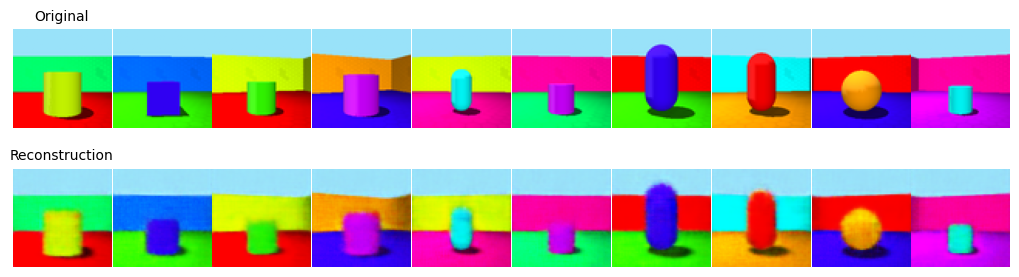

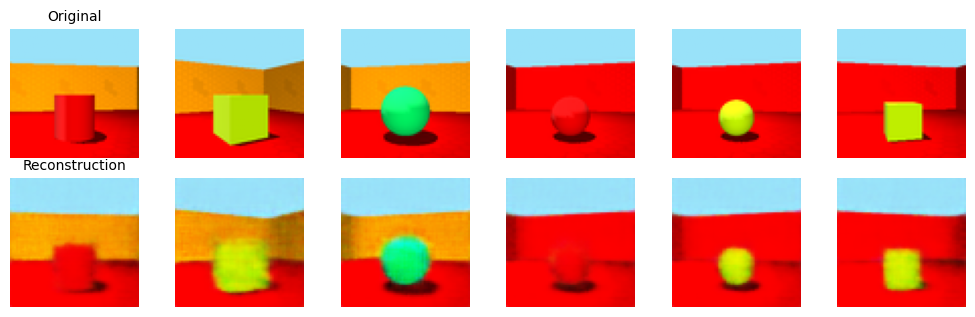

In [19]:
visualizer.plot_random_reconstructions(10, mode='mean')
visualizer.plot_reconstructions_sub_dataset([5000, 6000, 7000, 100, 1000, 1024], mode='mean')

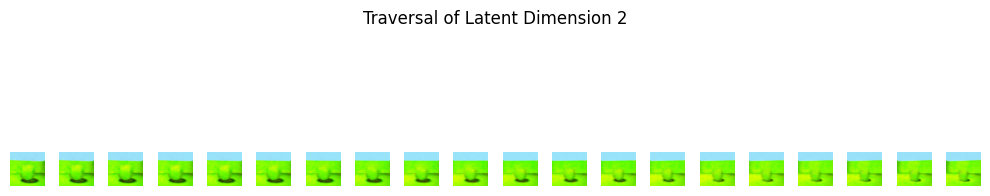

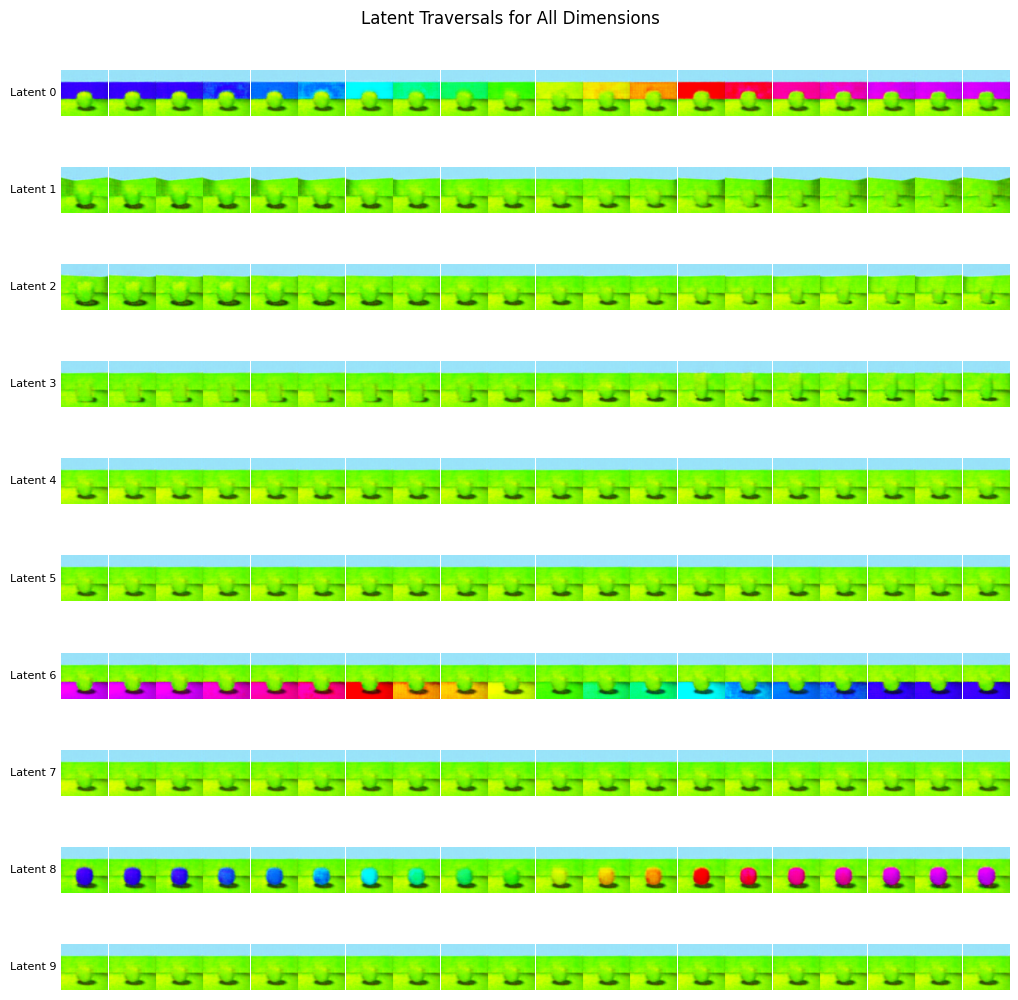

In [20]:
visualizer.plot_single_latent_traversal(2,20)
visualizer.plot_all_latent_traversals(20)

## dSprites

In [ ]:
# Create Beta VAE model for dSprites
img_size = dsprites[0][0].shape
latent_dim = 10
beta = 4.0  # Standard value for disentanglement in Beta-VAE

# Initialize the model and loss function
model_dsprites = Model(img_size=img_size, latent_dim=latent_dim).to(device)
# Use losses.select for consistency
loss_fn_dsprites = losses.select(name='betavae', beta=beta, rec_dist='bernoulli')
optimizer_dsprites = optim.Adam(model_dsprites.parameters(), lr=1e-4)

# Set up training parameters
num_epochs = 20 # Increased epochs for better training

In [22]:
# Training loop for the Beta VAE on dSprites dataset using the generic trainer
trainer_dsprites = UnsupervisedTrainer(model=model_dsprites,
                                     loss_fn=loss_fn_dsprites,
                                     scheduler=None,
                                     optimizer=optimizer_dsprites,
                                     device=device)

trainer_dsprites.train(dsprites_dataloader, num_epochs=num_epochs)

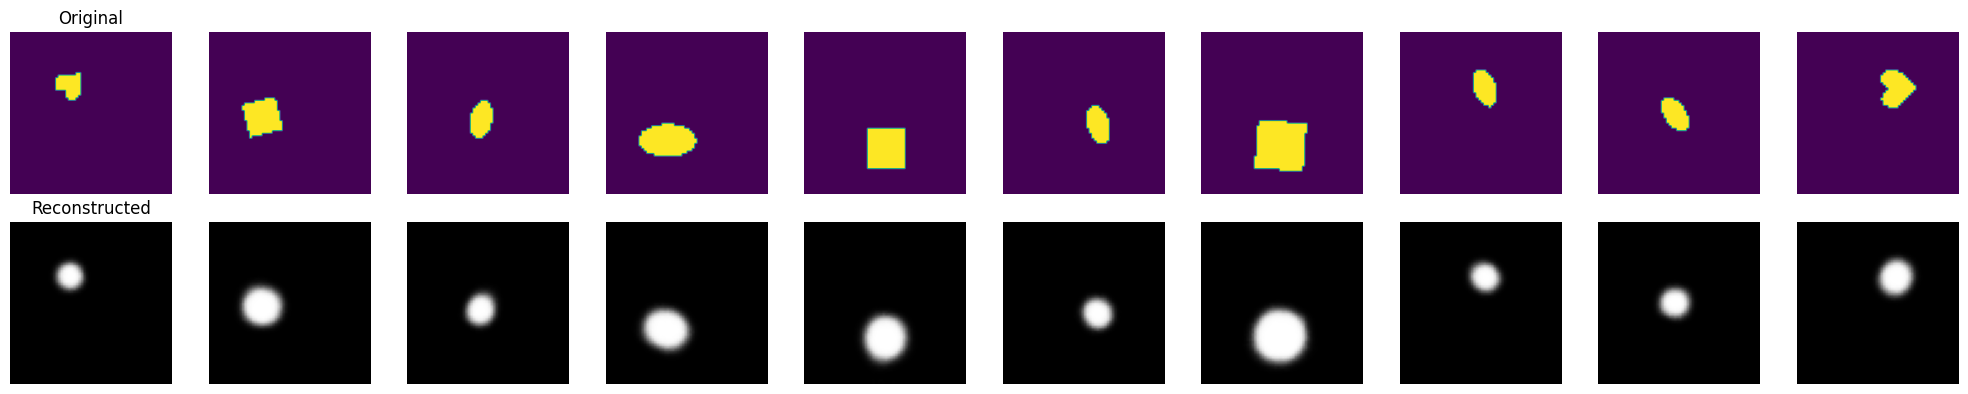

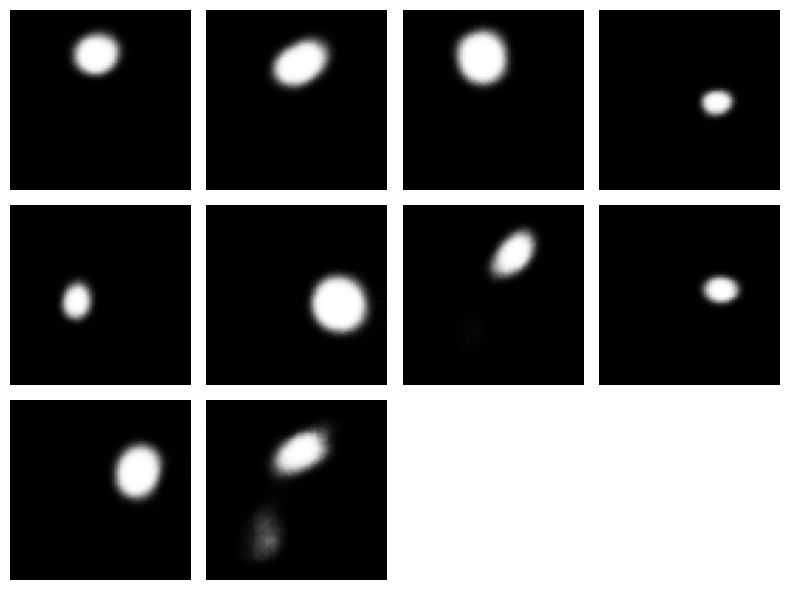

In [ ]:
# Visualize training results using the generic function (commented out)
# visualize_reconstructed_imgs(model_dsprites, dsprites_dataloader, 10, device)
# visualize_generated_imgs(model_dsprites, 10, device)

In [23]:
# Initialize visualizer for dSprites
visualizer_dsprites = utils.visualize.Visualizer(vae_model=model_dsprites, dataset=dsprites)

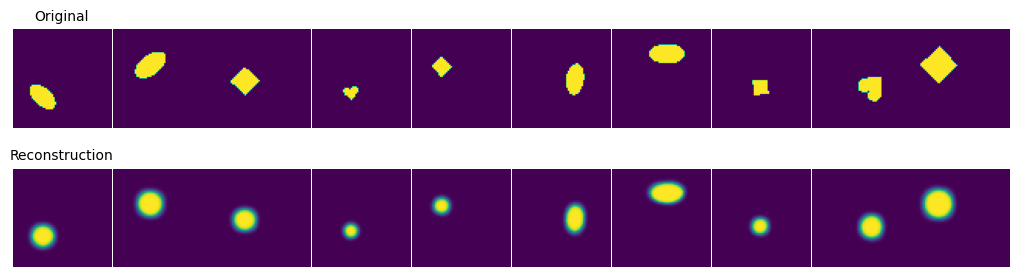

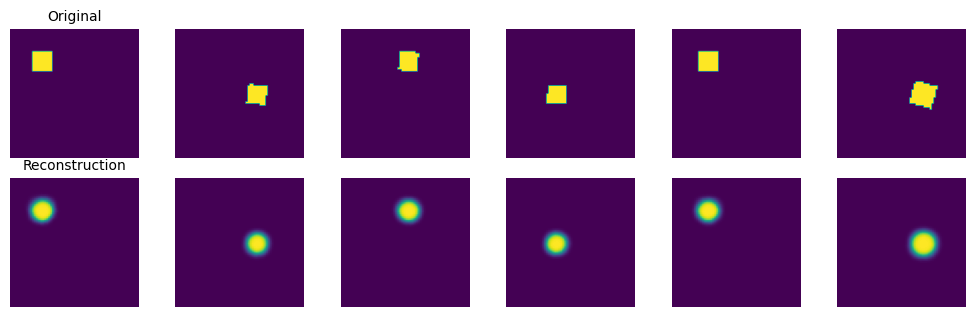

In [24]:
# Plot reconstructions for dSprites
visualizer_dsprites.plot_random_reconstructions(10, mode='mean')
# Select some indices for sub-dataset visualization (adjust as needed)
dsprites_indices = [0, 10000, 20000, 30000, 40000, 50000]
visualizer_dsprites.plot_reconstructions_sub_dataset(dsprites_indices, mode='mean')

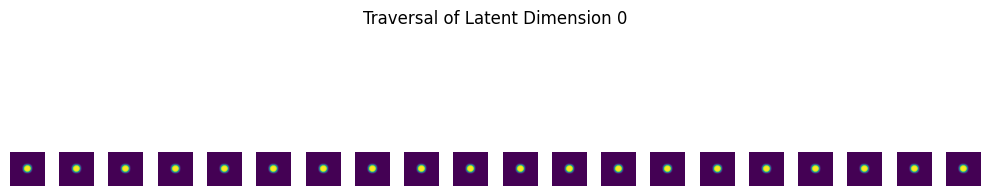

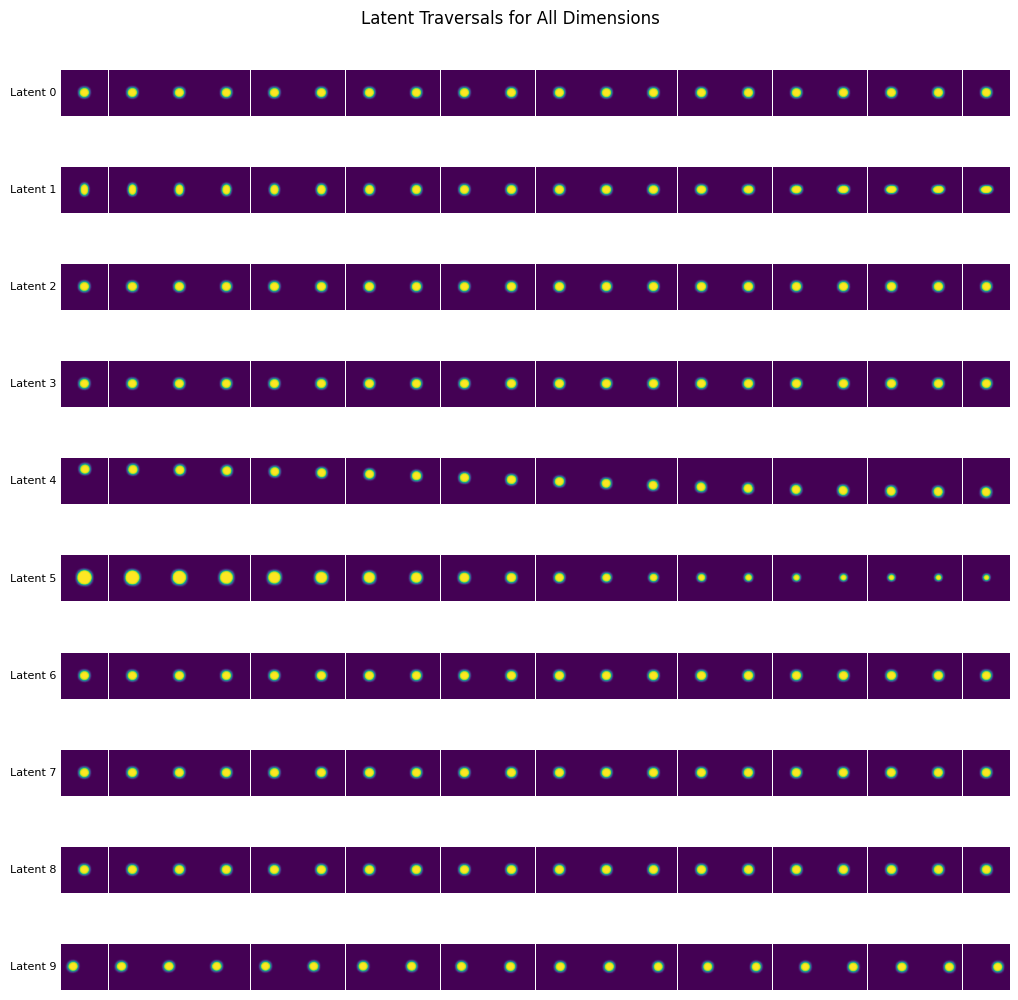

In [27]:
# Plot latent traversals for dSprites
# Select a sample index and latent dimension index for single traversal
visualizer_dsprites.plot_single_latent_traversal(latent_idx=0, num_samples=20)
visualizer_dsprites.plot_all_latent_traversals(num_samples=20)

# Annealed VAE

In [30]:
from vae_models.vae_burgess import Model
from losses.annealedvae import Loss as AnnealedLoss
import torch.optim as optim

## 3dShapes

In [31]:
# Create Annealed VAE model for 3D Shapes
img_size = shapes3d[0][0].shape
latent_dim = 10

# Initialize the model and loss function with annealing parameters
model_annealed_3dshapes = Model(img_size=img_size, latent_dim=latent_dim).to(device)
loss_fn_annealed_3dshapes = AnnealedLoss(
    C_init=0.0,          # Starting capacity
    C_fin=25.0,          # Final capacity
    gamma=100.0,         # Weight of KL divergence term
    anneal_steps=10000,  # Steps over which to anneal the capacity
    rec_dist='gaussian'  # Reconstruction distribution
)
optimizer_annealed_3dshapes = optim.Adam(model_annealed_3dshapes.parameters(), lr=1e-4)

# Set up training parameters
num_epochs = 5

In [32]:
# Training loop for the Annealed VAE on 3dShapes dataset
train_model(model_annealed_3dshapes, shapes3d_dataloader, optimizer_annealed_3dshapes, loss_fn_annealed_3dshapes, num_epochs, device)

Epoch: 1/5, Average Loss: 524.7945, Reconstruction: 506.8087, KL: 9.4110
Epoch: 2/5, Average Loss: 182.9840, Reconstruction: 154.5538, KL: 23.9587
Epoch: 3/5, Average Loss: 119.6861, Reconstruction: 93.7384, KL: 25.0020
Epoch: 4/5, Average Loss: 100.2475, Reconstruction: 76.4575, KL: 25.0040
Epoch: 5/5, Average Loss: 88.2677, Reconstruction: 66.9927, KL: 25.0013


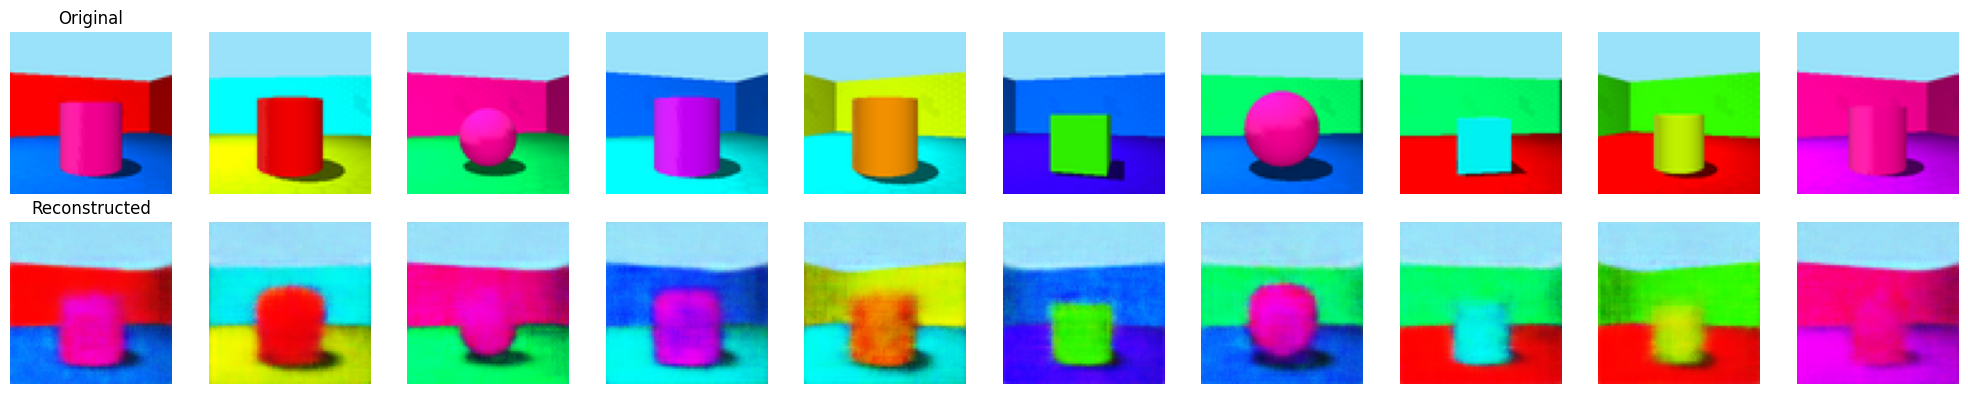

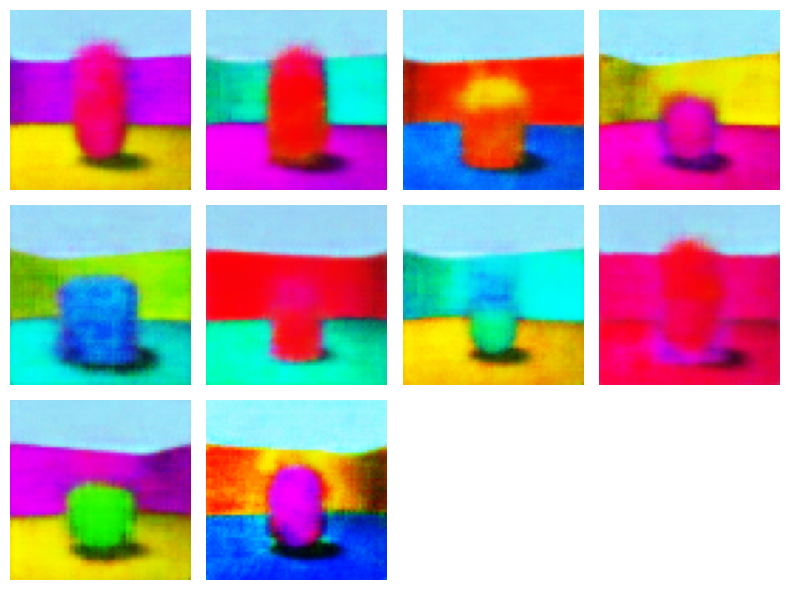

In [33]:
# Visualize training results
visualize_reconstructed_imgs(model_annealed_3dshapes, shapes3d_dataloader, 10, device)
visualize_generated_imgs(model_annealed_3dshapes, 10, device)

## dSprites

In [34]:
# Create Annealed VAE model for dSprites
img_size = dsprites[0][0].shape
latent_dim = 10

# Initialize the model and loss function with annealing parameters
model_annealed_dsprites = Model(img_size=img_size, latent_dim=latent_dim).to(device)
loss_fn_annealed_dsprites = AnnealedLoss(
    C_init=0.0,          # Starting capacity
    C_fin=15.0,          # Final capacity for dSprites (usually lower than 3dShapes)
    gamma=100.0,         # Weight of KL divergence term
    anneal_steps=10000,  # Steps over which to anneal the capacity
    rec_dist='gaussian'  # Reconstruction distribution
)
optimizer_annealed_dsprites = optim.Adam(model_annealed_dsprites.parameters(), lr=1e-4)

# Set up training parameters
num_epochs = 5

In [35]:
# Training loop for the Annealed VAE on dSprites dataset
train_model(model_annealed_dsprites, dsprites_dataloader, optimizer_annealed_dsprites, loss_fn_annealed_dsprites, num_epochs, device)

Epoch: 1/5, Average Loss: 117.7032, Reconstruction: 103.5409, KL: 8.4902
Epoch: 2/5, Average Loss: 44.7009, Reconstruction: 33.6293, KL: 14.9993
Epoch: 3/5, Average Loss: 41.3783, Reconstruction: 31.9772, KL: 14.9998
Epoch: 4/5, Average Loss: 38.0191, Reconstruction: 29.3839, KL: 15.0006
Epoch: 5/5, Average Loss: 36.1048, Reconstruction: 28.2405, KL: 15.0002


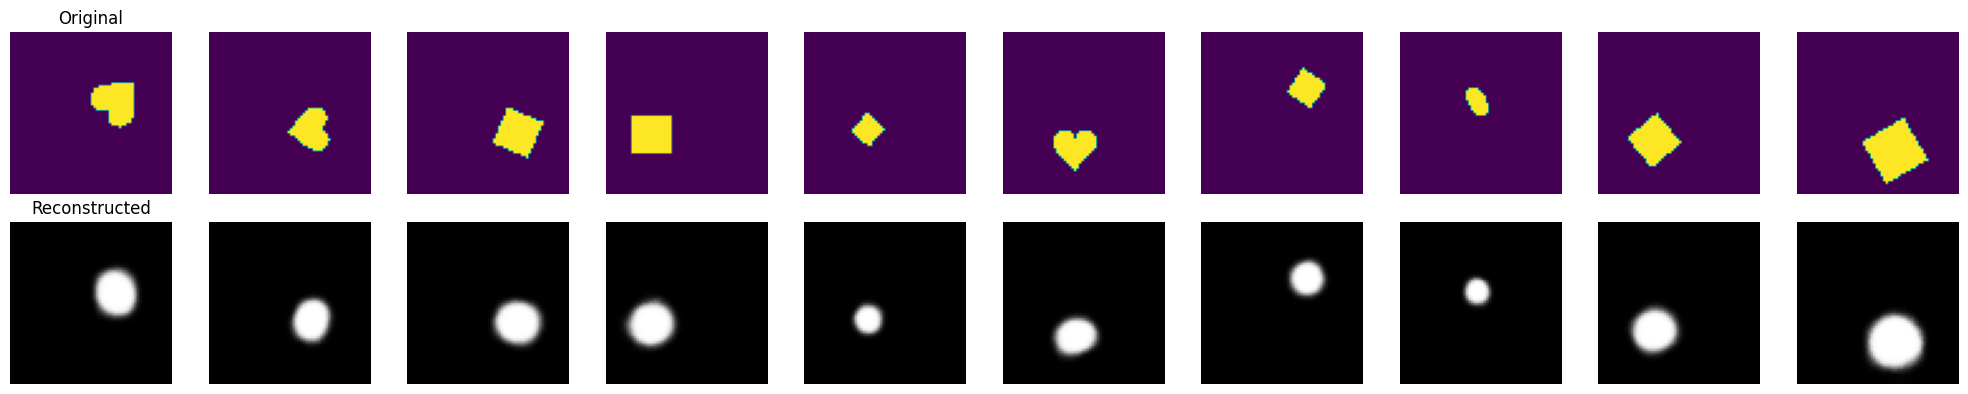

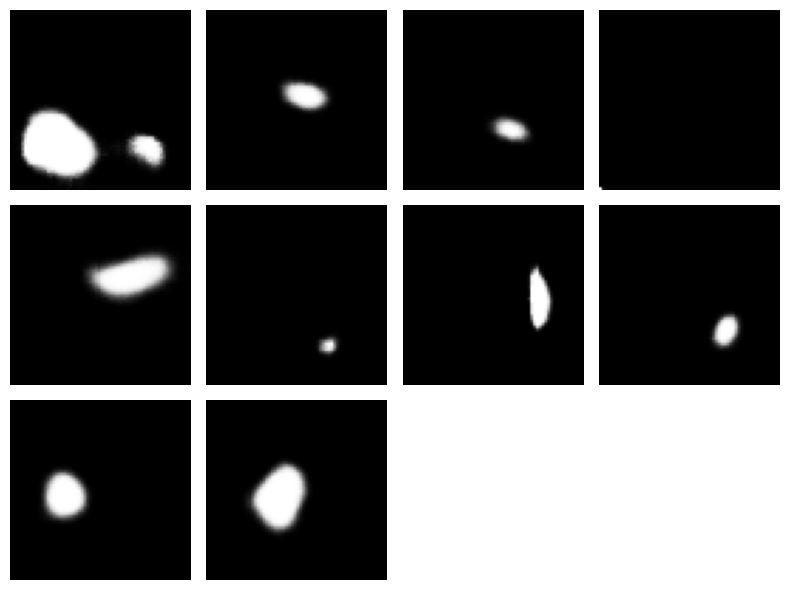

In [36]:
# Visualize training results
visualize_reconstructed_imgs(model_annealed_dsprites, dsprites_dataloader, 10, device)
visualize_generated_imgs(model_annealed_dsprites, 10, device)

# Beta-TC VAE

In [37]:
from vae_models.vae_burgess import Model
from losses.betatcvae import Loss as BetaTCLoss
import torch.optim as optim

## 3dShapes

In [38]:
# Create Beta-TC VAE model for 3D Shapes
img_size = shapes3d[0][0].shape
latent_dim = 10

# Initialize the model and loss function with Beta-TC parameters
model_betatc_3dshapes = Model(img_size=img_size, latent_dim=latent_dim).to(device)
loss_fn_betatc_3dshapes = BetaTCLoss(
    n_data=len(shapes3d),  # Required parameter - total number of samples in the dataset
    alpha=1.0,            # Weight of the mutual information term
    beta=6.0,             # Weight of the total correlation term (TC)
    gamma=1.0,            # Weight of the dimension-wise KL term
    is_mss=True,          # Use minibatch stratified sampling
    rec_dist='gaussian'   # Reconstruction distribution
)
optimizer_betatc_3dshapes = optim.Adam(model_betatc_3dshapes.parameters(), lr=1e-4)

# Set up training parameters
num_epochs = 5

In [39]:
# Training loop for Beta-TC VAE on 3dShapes dataset
train_model(model_betatc_3dshapes, shapes3d_dataloader, optimizer_betatc_3dshapes, loss_fn_betatc_3dshapes, num_epochs, device)

TypeError: Loss.__call__() missing 1 required positional argument: 'samples_qzx'

In [ ]:
# Visualize training results
visualize_reconstructed_imgs(model_betatc_3dshapes, shapes3d_dataloader, 10, device)
visualize_generated_imgs(model_betatc_3dshapes, 10, device)

## dSprites

In [ ]:
# Create Beta-TC VAE model for dSprites
img_size = dsprites[0][0].shape
latent_dim = 10

# Initialize the model and loss function with Beta-TC parameters
model_betatc_dsprites = Model(img_size=img_size, latent_dim=latent_dim).to(device)
loss_fn_betatc_dsprites = BetaTCLoss(
    n_data=len(dsprites),  # Required parameter - total number of samples in the dataset
    alpha=1.0,            # Weight of the mutual information term
    beta=4.0,             # Weight of the total correlation term (slightly lower for dSprites)
    gamma=1.0,            # Weight of the dimension-wise KL term
    is_mss=True,          # Use minibatch stratified sampling
    rec_dist='gaussian'   # Reconstruction distribution
)
optimizer_betatc_dsprites = optim.Adam(model_betatc_dsprites.parameters(), lr=1e-4)

# Set up training parameters
num_epochs = 5

In [ ]:
# Training loop for Beta-TC VAE on dSprites dataset
train_model(model_betatc_dsprites, dsprites_dataloader, optimizer_betatc_dsprites, loss_fn_betatc_dsprites, num_epochs, device)

In [ ]:
# Visualize training results
visualize_reconstructed_imgs(model_betatc_dsprites, dsprites_dataloader, 10, device)
visualize_generated_imgs(model_betatc_dsprites, 10, device)